# Importing Packages for Analysis

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Loading CSV file

In [17]:
# Load the dataset
file_path = "TECH_MAJOR_6_month_stock_prices.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,Date,Close,High,Low,Open,Volume,Growth,Company
0,2024-08-02,107.253426,108.703206,101.354343,103.743973,482027500,3.38,NVDA
1,2024-08-05,100.434486,103.394036,90.675999,92.045783,552842400,9.11,NVDA
2,2024-08-06,104.233894,107.693359,100.534469,103.823954,409012100,0.39,NVDA
3,2024-08-07,98.894730,108.783202,98.674762,107.793349,411440400,-8.26,NVDA
4,2024-08-08,104.953789,105.483706,97.504935,101.984246,391910000,2.91,NVDA


# Data Cleaning

In [18]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date       0
Close      0
High       0
Low        0
Open       0
Volume     0
Growth     0
Company    0
dtype: int64


In [19]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# Ensure 'Growth' column is correctly calculated (if not already)
if 'Growth' not in df.columns or df['Growth'].isnull().all():
    df['Growth'] = ((df['Close'] - df['Open']) / df['Open']) * 100

In [21]:
# Display basic statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                             Date       Close        High         Low  \
count                         500  500.000000  500.000000  500.000000   
mean   2024-10-30 23:36:57.600000  114.418549  116.369483  112.523454   
min           2024-08-02 00:00:00   18.889999   19.110001   18.510000   
25%           2024-09-17 00:00:00   80.728547   84.153027   74.464499   
50%           2024-10-30 00:00:00  137.094994  139.215204  135.165001   
75%           2024-12-13 00:00:00  157.441647  159.874996  155.527504   
max           2025-01-31 00:00:00  177.113495  181.152387  172.289993   
std                           NaN   56.009708   56.830852   55.200475   

             Open        Volume      Growth  
count  500.000000  5.000000e+02  500.000000  
mean   114.610715  9.941142e+07   -0.159860  
min     18.920000  2.839600e+06   -8.420000  
25%     75.534337  2.177065e+07   -1.630000  
50%    137.445260  4.795865e+07   -0.060000  
75%    157.591860  1.615066e+08    1.232500  

In [22]:
# Unique companies in the dataset
companies = df['Company'].unique()
print(f"\nCompanies in Dataset: {companies}")


Companies in Dataset: ['NVDA' 'AMD' 'INTC' 'QCOM']


# Exploratory Data Analysis

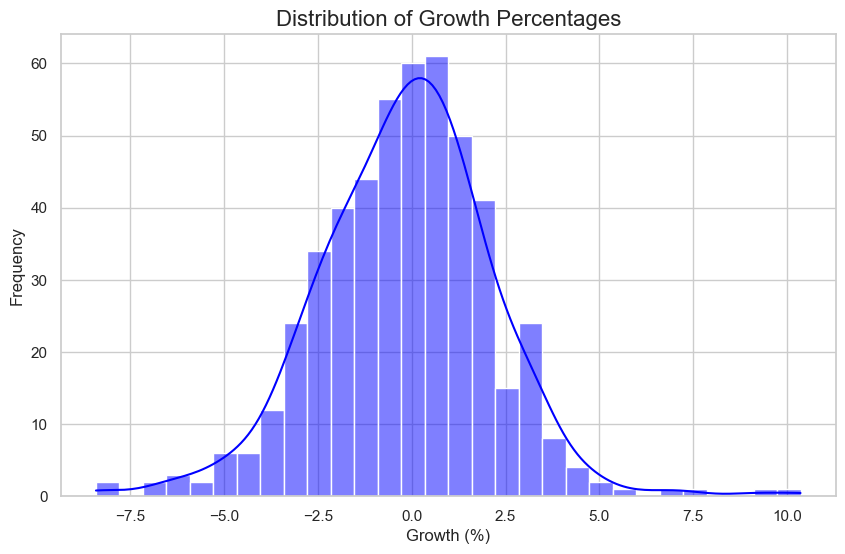

In [23]:
# 1. Distribution of Growth Percentages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Growth', kde=True, bins=30, color='blue')
plt.title('Distribution of Growth Percentages', fontsize=16)
plt.xlabel('Growth (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

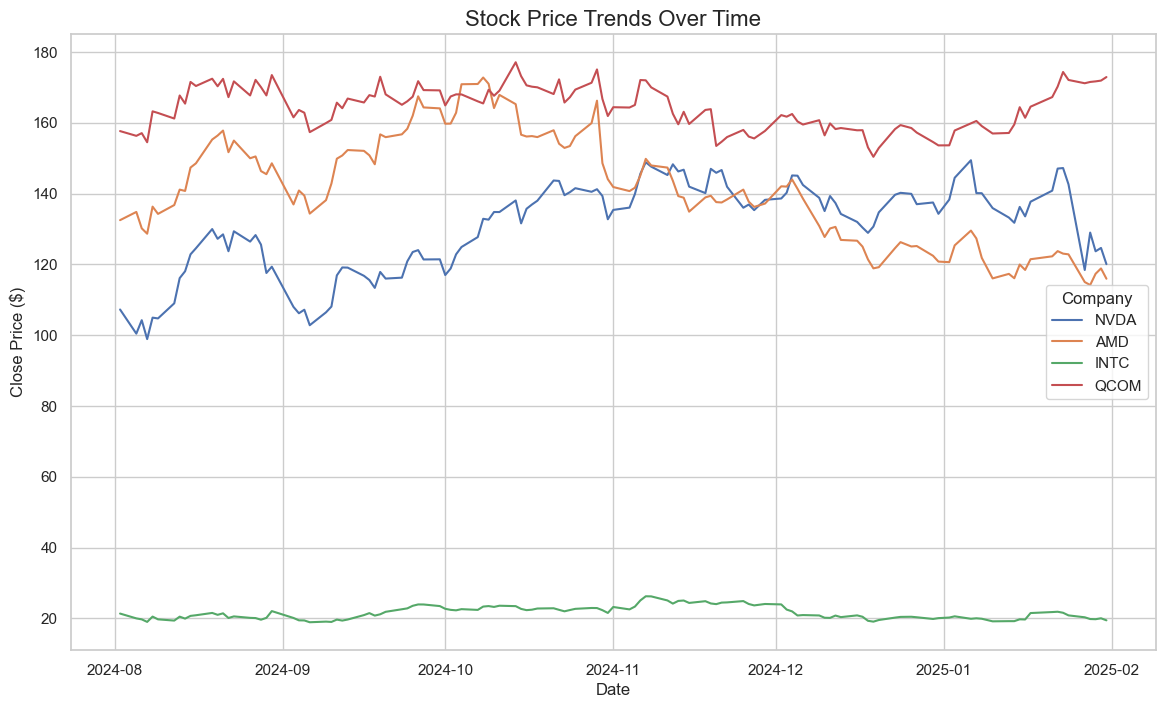

In [24]:
# 2. Stock Price Trends Over Time for Each Company
plt.figure(figsize=(14, 8))
for company in companies:
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.title('Stock Price Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.legend(title="Company")
plt.show()

/var/folders/07/3tkc2lhx1mdgpv9bv66td34r0000gn/T/ipykernel_9709/3641065676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='Growth', palette='Set2')


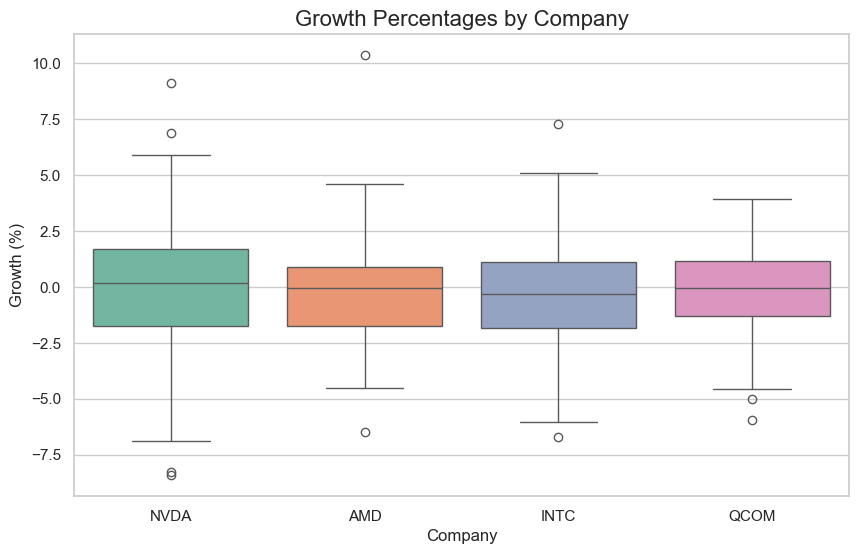

In [25]:
# 3. Boxplot of Growth Percentages by Company
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Company', y='Growth', palette='Set2')
plt.title('Growth Percentages by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.show()

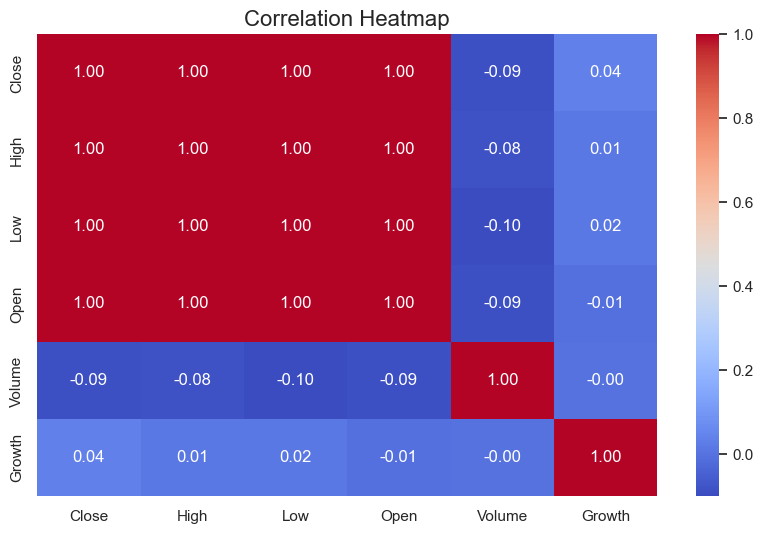

In [26]:
# 4. Correlation Heatmap for Numerical Columns
numerical_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Growth']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Analysis

In [27]:
print("1. Check which companies have the highest and lowest average growth percentages.")
avg_growth = df.groupby('Company')['Growth'].mean().sort_values(ascending=False)
print("\nAverage Growth by Company:")
print(avg_growth)

1. Check which companies have the highest and lowest average growth percentages.

Average Growth by Company:
Company
NVDA   -0.03432
QCOM   -0.10112
INTC   -0.25048
AMD    -0.25352
Name: Growth, dtype: float64


In [28]:
print("\n2. Identify which company has the most volatile stock prices (highest standard deviation).")
volatility = df.groupby('Company')['Close'].std().sort_values(ascending=False)
print("\nStock Price Volatility by Company:")
print(volatility)


2. Identify which company has the most volatile stock prices (highest standard deviation).

Stock Price Volatility by Company:
Company
AMD     15.268976
NVDA    12.596651
QCOM     6.055047
INTC     1.828694
Name: Close, dtype: float64


In [29]:
# Save aggregated insights to CSV
output_file = "aggregated_stock_insights.csv"
aggregated_data = pd.DataFrame({
    "Average Growth (%)": avg_growth,
    "Price Volatility (Std Dev)": volatility,
})
aggregated_data.to_csv(output_file, index=True)
print(f"\nAggregated insights saved to {output_file}.")


Aggregated insights saved to aggregated_stock_insights.csv.
